# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

625


In [3]:
#Create a "for loop" to pull cities from random list and mathc with csv then add to another list

# cities_csv = pd.read_csv(output_data_file)

# print(cities_csv)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name = cities
city_data =[]
city_log =[]
# url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
city_num = 0
for i, city in enumerate(city_name):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    try:
        response = requests.get(url).json()
        print(response)
        city_data.append({
            'city':response['name'],
            'lat':response['coord']['lat'],
            'lng':response['coord']['lon'],
            'max_temp':response['main']['temp_max'],
            'humidity':response['main']['humidity'],
            'cloudiness':response['clouds']['all'],
            'wind_speed':response['wind']['speed'],
            'country':response['sys']['country'],
            'date':response['dt'] })
        city_num+=1
        time.sleep(1)
        city_log.append({city_num,response['name']})
    except:
        print("NaN")
        # have to get rid of the city not found or turn to NaN
        pass

{'coord': {'lon': -64.4, 'lat': 49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 282.15, 'feels_like': 278.18, 'temp_min': 282.15, 'temp_max': 282.15, 'pressure': 1032, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 310}, 'clouds': {'all': 5}, 'dt': 1603031284, 'sys': {'type': 1, 'id': 807, 'country': 'CA', 'sunrise': 1603017799, 'sunset': 1603056099}, 'timezone': -14400, 'id': 6943832, 'name': 'Riviere-au-Renard', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
NaN
{'coord': {'lon': 45.02, 'lat': 58.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.98, 'feels_like': 272.15, 'temp_min': 276.98, 'temp_max': 276.98, 'pressure': 1000, 'humidity': 94, 'sea_level': 1000, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 4.75, 'deg': 141}, 'clouds': {'all': 100}, 'dt': 1603031285, 'sys': {

{'coord': {'lon': -79.24, 'lat': 42.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 282.03, 'feels_like': 276.87, 'temp_min': 281.15, 'temp_max': 283.15, 'pressure': 1024, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 180, 'gust': 7.7}, 'clouds': {'all': 1}, 'dt': 1603030918, 'sys': {'type': 1, 'id': 4588, 'country': 'US', 'sunrise': 1603020803, 'sunset': 1603060217}, 'timezone': -14400, 'id': 5122534, 'name': 'Jamestown', 'cod': 200}
{'coord': {'lon': 122.88, 'lat': -0.91}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.22, 'feels_like': 301.21, 'temp_min': 298.22, 'temp_max': 298.22, 'pressure': 1011, 'humidity': 80, 'sea_level': 1011, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 1.97, 'deg': 230}, 'rain': {'1h': 3.646}, 'clouds': {'all': 100}, 'dt': 1603031235, 'sys': {'country': 'ID', 's

{'coord': {'lon': 98.78, 'lat': 1.74}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.33, 'feels_like': 302.88, 'temp_min': 299.33, 'temp_max': 299.33, 'pressure': 1011, 'humidity': 75, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.19, 'deg': 27}, 'clouds': {'all': 100}, 'dt': 1603031316, 'sys': {'country': 'ID', 'sunrise': 1602976060, 'sunset': 1603019522}, 'timezone': 25200, 'id': 1213855, 'name': 'Sibolga', 'cod': 200}
{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 278.93, 'feels_like': 272, 'temp_min': 278.71, 'temp_max': 279.15, 'pressure': 982, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 270}, 'clouds': {'all': 40}, 'dt': 1603030903, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1603013351, 'sunset':

{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 294.04, 'feels_like': 289.68, 'temp_min': 293.15, 'temp_max': 294.82, 'pressure': 1016, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1603031207, 'sys': {'type': 1, 'id': 1899, 'country': 'ZA', 'sunrise': 1602993634, 'sunset': 1603040515}, 'timezone': 7200, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 293.15, 'feels_like': 293.51, 'temp_min': 293.15, 'temp_max': 293.15, 'pressure': 1012, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 160}, 'clouds': {'all': 40}, 'dt': 1603031015, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 1603127138, 'sunset': 1603172717}, 't

{'coord': {'lon': -57.53, 'lat': -25.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 306.15, 'feels_like': 303.06, 'temp_min': 306.15, 'temp_max': 306.15, 'pressure': 1012, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1603031350, 'sys': {'type': 1, 'id': 8575, 'country': 'PY', 'sunrise': 1603012346, 'sunset': 1603058255}, 'timezone': -10800, 'id': 3437056, 'name': 'San Lorenzo', 'cod': 200}
{'coord': {'lon': 14.28, 'lat': -22.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 290.37, 'feels_like': 288.86, 'temp_min': 290.37, 'temp_max': 290.37, 'pressure': 1011, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 191, 'gust': 6.26}, 'clouds': {'all': 4}, 'dt': 1603031351, 'sys': {'type': 3, 'id': 2012545, 'country': 'NA', 'sunrise': 1602995287, 'sunset': 16030

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 274.65, 'feels_like': 270.16, 'temp_min': 274.65, 'temp_max': 274.65, 'pressure': 1029, 'humidity': 83, 'sea_level': 1029, 'grnd_level': 1029}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 86}, 'clouds': {'all': 93}, 'dt': 1603030921, 'sys': {'country': 'GL', 'sunrise': 1603027475, 'sunset': 1603048804}, 'timezone': -10800, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
{'coord': {'lon': -157.74, 'lat': 21.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.57, 'feels_like': 300.27, 'temp_min': 296.48, 'temp_max': 298.15, 'pressure': 1011, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 168}, 'clouds': {'all': 1}, 'dt': 1603031367, 'sys': {'type': 1, 'id': 7877, 'country': 'US', 'sunrise': 1603038475, 'sunset': 16

{'coord': {'lon': -95.04, 'lat': 45.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 269.59, 'feels_like': 263.85, 'temp_min': 268.71, 'temp_max': 270.15, 'pressure': 1025, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 270}, 'clouds': {'all': 90}, 'dt': 1603031384, 'sys': {'type': 1, 'id': 3407, 'country': 'US', 'sunrise': 1603024828, 'sunset': 1603063776}, 'timezone': -18000, 'id': 5052916, 'name': 'Willmar', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
NaN
{'coord': {'lon': -66.9, 'lat': -4.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.1, 'feels_like': 304.09, 'temp_min': 299.1, 'temp_max': 299.1, 'pressure': 1012, 'humidity': 85, 'sea_level': 1012, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 0.54, 'deg': 306}, 'clouds': {'all': 100}, 'dt': 1603031385, 'sys': 

{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.31, 'feels_like': 305.26, 'temp_min': 299.15, 'temp_max': 301.48, 'pressure': 1013, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1603031400, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise': 1603025829, 'sunset': 1603067650}, 'timezone': -18000, 'id': 4004293, 'name': 'Ixtapa', 'cod': 200}
{'coord': {'lon': 170.1, 'lat': -45.13}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 278.15, 'feels_like': 276.38, 'temp_min': 278.15, 'temp_max': 278.15, 'pressure': 1006, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 0.72, 'deg': 347}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1603031401, 'sys': {'type': 3, 'id': 2005913, 'country': 'NZ', 'sunrise': 1603042732, 'sunse

{'coord': {'lon': 25.2, 'lat': 0.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.01, 'feels_like': 304.16, 'temp_min': 300.01, 'temp_max': 300.01, 'pressure': 1007, 'humidity': 73, 'sea_level': 1007, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 0.49, 'deg': 255}, 'clouds': {'all': 99}, 'dt': 1603031416, 'sys': {'country': 'CD', 'sunrise': 1602993667, 'sunset': 1603037229}, 'timezone': 7200, 'id': 212730, 'name': 'Kisangani', 'cod': 200}
{'coord': {'lon': -27.98, 'lat': 39.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 289.91, 'feels_like': 285, 'temp_min': 289.91, 'temp_max': 289.91, 'pressure': 1008, 'humidity': 61, 'sea_level': 1008, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 6.78, 'deg': 330}, 'clouds': {'all': 56}, 'dt': 1603031417, 'sys': {'country': 'PT', 'sunrise': 160300828

{'coord': {'lon': -12.46, 'lat': 14.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 314.12, 'feels_like': 308.94, 'temp_min': 314.12, 'temp_max': 314.12, 'pressure': 1007, 'humidity': 12, 'sea_level': 1007, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 6.06, 'deg': 91}, 'clouds': {'all': 0}, 'dt': 1603031434, 'sys': {'country': 'SN', 'sunrise': 1603003307, 'sunset': 1603045663}, 'timezone': 0, 'id': 2252606, 'name': 'Bakel', 'cod': 200}
{'coord': {'lon': 36.45, 'lat': -3.3}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.15, 'feels_like': 298.01, 'temp_min': 301.15, 'temp_max': 301.15, 'pressure': 1016, 'humidity': 30}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1603031435, 'sys': {'type': 1, 'id': 2607, 'country': 'TZ', 'sunrise': 1602990810, 'sunset': 1603034687}, 't

{'coord': {'lon': -110.3, 'lat': 31.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 287.63, 'feels_like': 282.82, 'temp_min': 285.93, 'temp_max': 290.15, 'pressure': 1022, 'humidity': 25}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 210}, 'clouds': {'all': 1}, 'dt': 1603031451, 'sys': {'type': 1, 'id': 4096, 'country': 'US', 'sunrise': 1603027600, 'sunset': 1603068327}, 'timezone': -25200, 'id': 5314328, 'name': 'Sierra Vista', 'cod': 200}
{'coord': {'lon': -85.89, 'lat': 38.96}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 283.8, 'feels_like': 282.68, 'temp_min': 283.15, 'temp_max': 284.26, 'pressure': 1023, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 306, 'gust': 0.89}, 'rain': {'1h': 0.45}, 'clouds': {'all': 100}, 'dt': 1603031267, 'sys': {'type': 3, 'id': 2034812, 'country': 'US', 'sunrise': 160

{'coord': {'lon': 49.77, 'lat': -16.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 296.31, 'feels_like': 297.59, 'temp_min': 296.31, 'temp_max': 296.31, 'pressure': 1016, 'humidity': 78, 'sea_level': 1016, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 153}, 'clouds': {'all': 0}, 'dt': 1603031468, 'sys': {'country': 'MG', 'sunrise': 1602987057, 'sunset': 1603032047}, 'timezone': 10800, 'id': 1061412, 'name': 'Mananara', 'cod': 200}
{'coord': {'lon': -114.35, 'lat': 62.46}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 269.15, 'feels_like': 264.25, 'temp_min': 269.15, 'temp_max': 269.15, 'pressure': 1023, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 320}, 'clouds': {'all': 90}, 'dt': 1603030949, 'sys': {'type': 1, 'id': 1007, 'country': 'CA', 'sunrise': 1603031565, 'sunset': 16030663

{'coord': {'lon': 35.15, 'lat': 46.69}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.59, 'feels_like': 289.19, 'temp_min': 290.59, 'temp_max': 290.59, 'pressure': 1014, 'humidity': 60, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 1.91, 'deg': 330}, 'clouds': {'all': 85}, 'dt': 1603031484, 'sys': {'country': 'UA', 'sunrise': 1602993680, 'sunset': 1603032440}, 'timezone': 10800, 'id': 713743, 'name': 'Yakymivka', 'cod': 200}
{'coord': {'lon': -20.27, 'lat': 63.44}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 280.15, 'feels_like': 274.68, 'temp_min': 280.15, 'temp_max': 280.15, 'pressure': 1009, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1603031249, 'sys': {'type': 1, 'id': 93, 'country': 'IS', 'sunrise': 1603009132, 'sunset': 160

{'coord': {'lon': 147.92, 'lat': 70.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 266.57, 'feels_like': 261.19, 'temp_min': 266.57, 'temp_max': 266.57, 'pressure': 995, 'humidity': 98, 'sea_level': 995, 'grnd_level': 990}, 'visibility': 612, 'wind': {'speed': 3.7, 'deg': 171}, 'clouds': {'all': 93}, 'dt': 1603030997, 'sys': {'country': 'RU', 'sunrise': 1603057312, 'sunset': 1603087464}, 'timezone': 39600, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
{'coord': {'lon': 152.43, 'lat': -3.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.86, 'feels_like': 302.96, 'temp_min': 299.86, 'temp_max': 299.86, 'pressure': 1009, 'humidity': 79, 'sea_level': 1009, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.87, 'deg': 72}, 'clouds': {'all': 100}, 'dt': 1603031502, 'sys': {'country': 'PG', 'sunrise': 160

{'coord': {'lon': 72.52, 'lat': 65.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 269.4, 'feels_like': 262.14, 'temp_min': 269.4, 'temp_max': 269.4, 'pressure': 1005, 'humidity': 96, 'sea_level': 1005, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 6.75, 'deg': 280}, 'clouds': {'all': 54}, 'dt': 1603031518, 'sys': {'country': 'RU', 'sunrise': 1602987269, 'sunset': 1603020916}, 'timezone': 18000, 'id': 1498087, 'name': 'Nadym', 'cod': 200}
{'coord': {'lon': -62.27, 'lat': -38.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 299.52, 'feels_like': 295.52, 'temp_min': 299.52, 'temp_max': 299.52, 'pressure': 1008, 'humidity': 19, 'sea_level': 1008, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.07, 'deg': 203}, 'clouds': {'all': 39}, 'dt': 1603031519, 'sys': {'country': 'AR', 'sunrise': 160301

{'coord': {'lon': 31.11, 'lat': 70.37}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 271.15, 'feels_like': 266.13, 'temp_min': 271.15, 'temp_max': 271.15, 'pressure': 1010, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1603030958, 'sys': {'type': 1, 'id': 1682, 'country': 'NO', 'sunrise': 1602998663, 'sunset': 1603029396}, 'timezone': 7200, 'id': 777019, 'name': 'Vardø', 'cod': 200}
{'coord': {'lon': -73.82, 'lat': -41.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 285.2, 'feels_like': 277.98, 'temp_min': 284.15, 'temp_max': 286.48, 'pressure': 1009, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 9.3, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1603031535, 'sys': {'type': 1, 'id': 8512, 'country': 'CL', 'sunrise': 1603015185, 'sunset': 1603063235}, 'timezone'

{'coord': {'lon': 2.37, 'lat': 41.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 291.62, 'feels_like': 291.93, 'temp_min': 291.48, 'temp_max': 292.04, 'pressure': 1021, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 265, 'gust': 2.24}, 'clouds': {'all': 10}, 'dt': 1603031551, 'sys': {'type': 3, 'id': 2002438, 'country': 'ES', 'sunrise': 1603001158, 'sunset': 1603040695}, 'timezone': 7200, 'id': 3112866, 'name': 'Premià de Mar', 'cod': 200}
{'coord': {'lon': -40.79, 'lat': -11.85}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.41, 'feels_like': 298.59, 'temp_min': 299.41, 'temp_max': 299.41, 'pressure': 1013, 'humidity': 56, 'sea_level': 1013, 'grnd_level': 925}, 'visibility': 10000, 'wind': {'speed': 4.44, 'deg': 125}, 'clouds': {'all': 72}, 'dt': 1603031553, 'sys': {'country': 'BR', 'sunrise': 16030

{'coord': {'lon': 32.23, 'lat': -0.31}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 295.15, 'feels_like': 297.32, 'temp_min': 295.15, 'temp_max': 295.15, 'pressure': 1014, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1603031568, 'sys': {'type': 1, 'id': 2642, 'country': 'UG', 'sunrise': 1602991946, 'sunset': 1603035576}, 'timezone': 10800, 'id': 232571, 'name': 'Kalangala', 'cod': 200}
{'coord': {'lon': -87.9, 'lat': 30.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.32, 'feels_like': 290.84, 'temp_min': 290.15, 'temp_max': 292.59, 'pressure': 1023, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1603031304, 'sys': {'type': 1, 'id': 3692, 'country': 'US', 'sunrise': 1603022165, 'sunset': 1603063011}, 'timez

{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 261.15, 'feels_like': 256.49, 'temp_min': 261.15, 'temp_max': 261.15, 'pressure': 1006, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1603031018, 'sys': {'type': 1, 'id': 8846, 'country': 'RU', 'sunrise': 1602978004, 'sunset': 1603011473}, 'timezone': 32400, 'id': 2027296, 'name': 'Aykhal', 'cod': 200}
{'coord': {'lon': 45.05, 'lat': -25.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 296.3, 'feels_like': 292.03, 'temp_min': 296.3, 'temp_max': 296.3, 'pressure': 1014, 'humidity': 59, 'sea_level': 1014, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 8.25, 'deg': 119}, 'clouds': {'all': 0}, 'dt': 1603031190, 'sys': {'country': 'MG', 'sunrise': 1602987750, 'sunset': 1603033619}, 'timezon

{'coord': {'lon': 173.78, 'lat': -35.1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 284.26, 'feels_like': 283.6, 'temp_min': 284.26, 'temp_max': 284.26, 'pressure': 1018, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 277, 'gust': 3.58}, 'clouds': {'all': 30}, 'dt': 1603031601, 'sys': {'type': 3, 'id': 2012217, 'country': 'NZ', 'sunrise': 1603042630, 'sunset': 1603089734}, 'timezone': 46800, 'id': 2189343, 'name': 'Kaeo', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
NaN
{'coord': {'lon': 164.28, 'lat': -20.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.75, 'feels_like': 294.13, 'temp_min': 293.75, 'temp_max': 293.75, 'pressure': 1014, 'humidity': 76, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.41, 'deg': 61}, 'clouds': {'all': 1}, 'dt': 1603031602

{'coord': {'lon': 124.33, 'lat': 43.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 280.14, 'feels_like': 275.17, 'temp_min': 280.14, 'temp_max': 280.14, 'pressure': 1023, 'humidity': 56, 'sea_level': 1023, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 188}, 'clouds': {'all': 0}, 'dt': 1603031617, 'sys': {'country': 'CN', 'sunrise': 1602971993, 'sunset': 1603011327}, 'timezone': 28800, 'id': 2036055, 'name': 'Lishu', 'cod': 200}
{'coord': {'lon': 18.07, 'lat': 1.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.51, 'feels_like': 305.47, 'temp_min': 300.51, 'temp_max': 300.51, 'pressure': 1005, 'humidity': 79, 'sea_level': 1005, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 0.72, 'deg': 92}, 'rain': {'1h': 0.57}, 'clouds': {'all': 100}, 'dt': 1603031618, 'sys': {'country': 'CG', 'sunrise':

{'cod': '404', 'message': 'city not found'}
NaN
{'coord': {'lon': -5.2, 'lat': 9.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.54, 'feels_like': 307.35, 'temp_min': 304.54, 'temp_max': 304.54, 'pressure': 1007, 'humidity': 54, 'sea_level': 1007, 'grnd_level': 972}, 'visibility': 10000, 'wind': {'speed': 1.92, 'deg': 80}, 'clouds': {'all': 99}, 'dt': 1603031633, 'sys': {'country': 'CI', 'sunrise': 1603001339, 'sunset': 1603044147}, 'timezone': 0, 'id': 2289049, 'name': 'Ferkessédougou', 'cod': 200}
{'coord': {'lon': 28.82, 'lat': -28.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 302.68, 'feels_like': 297.69, 'temp_min': 302.68, 'temp_max': 302.68, 'pressure': 1010, 'humidity': 13, 'sea_level': 1010, 'grnd_level': 840}, 'visibility': 10000, 'wind': {'speed': 3.94, 'deg': 259}, 'clouds': {'all': 40}, 'dt': 160

{'coord': {'lon': -68.54, 'lat': -31.54}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 303.8, 'feels_like': 297.05, 'temp_min': 303.8, 'temp_max': 303.8, 'pressure': 1006, 'humidity': 22, 'sea_level': 1006, 'grnd_level': 936}, 'visibility': 10000, 'wind': {'speed': 8.48, 'deg': 168}, 'clouds': {'all': 0}, 'dt': 1603031393, 'sys': {'country': 'AR', 'sunrise': 1603014636, 'sunset': 1603061249}, 'timezone': -10800, 'id': 3837213, 'name': 'San Juan', 'cod': 200}
{'coord': {'lon': 125.48, 'lat': 12.22}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.75, 'feels_like': 304.76, 'temp_min': 300.75, 'temp_max': 300.75, 'pressure': 1008, 'humidity': 83, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.96, 'deg': 16}, 'clouds': {'all': 100}, 'dt': 1603031650, 'sys': {'country': 'PH', 'sunrise': 160297008

{'coord': {'lon': -50.05, 'lat': -0.18}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 306.59, 'feels_like': 307.85, 'temp_min': 306.59, 'temp_max': 306.59, 'pressure': 1010, 'humidity': 45, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.39, 'deg': 63}, 'clouds': {'all': 38}, 'dt': 1603031503, 'sys': {'country': 'BR', 'sunrise': 1603011696, 'sunset': 1603055315}, 'timezone': -10800, 'id': 3385980, 'name': 'Tucumã', 'cod': 200}
{'coord': {'lon': 48.53, 'lat': 5.35}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 300.06, 'feels_like': 299.8, 'temp_min': 300.06, 'temp_max': 300.06, 'pressure': 1009, 'humidity': 79, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 7.82, 'deg': 192}, 'clouds': {'all': 14}, 'dt': 1603031666, 'sys': {'country': 'SO', 'sunrise': 16029882

{'coord': {'lon': -124.22, 'lat': 43.37}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 282.8, 'feels_like': 281.7, 'temp_min': 282.15, 'temp_max': 283.71, 'pressure': 1023, 'humidity': 100}, 'visibility': 2414, 'wind': {'speed': 1.5, 'deg': 90}, 'clouds': {'all': 90}, 'dt': 1603031681, 'sys': {'type': 1, 'id': 5239, 'country': 'US', 'sunrise': 1603031701, 'sunset': 1603070907}, 'timezone': -25200, 'id': 5720495, 'name': 'Coos Bay', 'cod': 200}
{'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 282.34, 'feels_like': 280.16, 'temp_min': 282.04, 'temp_max': 282.59, 'pressure': 991, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 2.27, 'deg': 15}, 'rain': {'1h': 0.82}, 'clouds': {'all': 100}, 'dt': 1603031238, 'sys': {'type': 3, 'id': 2031989, 'country': 'NZ', 'sunrise': 1603042567, 'sunset': 1603091

{'coord': {'lon': -103.88, 'lat': 23.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 290.62, 'feels_like': 289.04, 'temp_min': 290.62, 'temp_max': 290.62, 'pressure': 1019, 'humidity': 43, 'sea_level': 1019, 'grnd_level': 785}, 'visibility': 10000, 'wind': {'speed': 0.58, 'deg': 27}, 'clouds': {'all': 0}, 'dt': 1603031697, 'sys': {'country': 'MX', 'sunrise': 1603025644, 'sunset': 1603067202}, 'timezone': -18000, 'id': 4014603, 'name': 'Chalchihuites', 'cod': 200}
{'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 292.62, 'feels_like': 291.32, 'temp_min': 292.62, 'temp_max': 292.62, 'pressure': 1017, 'humidity': 68, 'sea_level': 1017, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 210}, 'clouds': {'all': 73}, 'dt': 1603031698, 'sys': {'country': 'PE', 'sunrise': 1603

{'coord': {'lon': 99.94, 'lat': 9.54}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 301.45, 'temp_min': 300.15, 'temp_max': 300.15, 'pressure': 1009, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 6.34, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1603031713, 'sys': {'type': 1, 'id': 9273, 'country': 'TH', 'sunrise': 1602976102, 'sunset': 1603018923}, 'timezone': 25200, 'id': 1154689, 'name': 'Ko Samui', 'cod': 200}
{'coord': {'lon': -100.77, 'lat': 41.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 273.24, 'feels_like': 267.87, 'temp_min': 272.59, 'temp_max': 274.15, 'pressure': 1025, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 20}, 'clouds': {'all': 90}, 'dt': 1603031715, 'sys': {'type': 1, 'id': 4674, 'country': 'US', 'sunrise': 1603025905, 'sunset': 1603065449}, 'tim

{'coord': {'lon': -71.83, 'lat': -36.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 285.15, 'feels_like': 282.72, 'temp_min': 285.15, 'temp_max': 285.15, 'pressure': 1017, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 250}, 'clouds': {'all': 40}, 'dt': 1603031731, 'sys': {'type': 1, 'id': 8483, 'country': 'CL', 'sunrise': 1603015098, 'sunset': 1603062366}, 'timezone': -10800, 'id': 3894406, 'name': 'Coihueco', 'cod': 200}
{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 262.28, 'feels_like': 257.65, 'temp_min': 262.28, 'temp_max': 262.28, 'pressure': 1011, 'humidity': 95, 'sea_level': 1011, 'grnd_level': 1005}, 'visibility': 2001, 'wind': {'speed': 2.09, 'deg': 300}, 'clouds': {'all': 92}, 'dt': 1603031732, 'sys': {'country': 'RU', 'sunrise': 1602975341, 's

{'coord': {'lon': 135.88, 'lat': 46.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 268.37, 'feels_like': 264.93, 'temp_min': 268.37, 'temp_max': 268.37, 'pressure': 1022, 'humidity': 95, 'sea_level': 1022, 'grnd_level': 937}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 245}, 'clouds': {'all': 1}, 'dt': 1603031747, 'sys': {'country': 'RU', 'sunrise': 1603055949, 'sunset': 1603094605}, 'timezone': 36000, 'id': 2013279, 'name': 'Vostok', 'cod': 200}
{'coord': {'lon': 39.28, 'lat': -10.94}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 300.29, 'feels_like': 297.7, 'temp_min': 300.29, 'temp_max': 300.29, 'pressure': 1010, 'humidity': 45, 'sea_level': 1010, 'grnd_level': 934}, 'visibility': 10000, 'wind': {'speed': 5.59, 'deg': 88}, 'clouds': {'all': 14}, 'dt': 1603031748, 'sys': {'country': 'TZ', 'sunrise': 1602989807, 'sunse

{'coord': {'lon': -1.91, 'lat': 53.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 282.19, 'feels_like': 280.21, 'temp_min': 281.15, 'temp_max': 282.59, 'pressure': 1022, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1603031763, 'sys': {'type': 1, 'id': 1423, 'country': 'GB', 'sunrise': 1603003280, 'sunset': 1603040627}, 'timezone': 3600, 'id': 2645889, 'name': 'Keighley', 'cod': 200}
{'coord': {'lon': 80.26, 'lat': 41.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 285.28, 'feels_like': 282.5, 'temp_min': 285.28, 'temp_max': 285.28, 'pressure': 1027, 'humidity': 39, 'sea_level': 1027, 'grnd_level': 902}, 'visibility': 10000, 'wind': {'speed': 0.85, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1603031764, 'sys': {'country': 'CN', 'sunrise': 1602982424, 'sunset': 160302204

{'coord': {'lon': -23.71, 'lat': 64.89}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 277.26, 'feels_like': 269.51, 'temp_min': 277.26, 'temp_max': 277.26, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.29, 'deg': 23}, 'rain': {'1h': 1.8452}, 'clouds': {'all': 85}, 'dt': 1603031268, 'sys': {'country': 'IS', 'sunrise': 1603010269, 'sunset': 1603044101}, 'timezone': 0, 'id': 3414079, 'name': 'Olafsvik', 'cod': 200}
{'coord': {'lon': -39.25, 'lat': -17.71}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 299.22, 'feels_like': 299.36, 'temp_min': 299.22, 'temp_max': 299.22, 'pressure': 1017, 'humidity': 67, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 4.72, 'deg': 126}, 'rain': {'1h': 0.22}, 'clouds': {'all': 41}, 'dt': 1603031256, 'sys

{'coord': {'lon': 72.85, 'lat': 19.01}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 301.15, 'feels_like': 305.57, 'temp_min': 301.15, 'temp_max': 301.15, 'pressure': 1007, 'humidity': 88}, 'visibility': 4000, 'wind': {'speed': 3.6, 'deg': 240}, 'clouds': {'all': 20}, 'dt': 1603031681, 'sys': {'type': 1, 'id': 9052, 'country': 'IN', 'sunrise': 1602983010, 'sunset': 1603025017}, 'timezone': 19800, 'id': 1275339, 'name': 'Mumbai', 'cod': 200}
{'coord': {'lon': -77.03, 'lat': -12.04}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 289.98, 'feels_like': 289.69, 'temp_min': 289.82, 'temp_max': 290.15, 'pressure': 1015, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 260}, 'clouds': {'all': 90}, 'dt': 1603031703, 'sys': {'type': 1, 'id': 8682, 'country': 'PE', 'sunrise': 1603017663, 'sunset': 1603062297}, 'timezone': -1

{'coord': {'lon': 45.04, 'lat': 12.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 302.74, 'feels_like': 306.47, 'temp_min': 302.74, 'temp_max': 302.74, 'pressure': 1009, 'humidity': 62, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 132}, 'clouds': {'all': 0}, 'dt': 1603031598, 'sys': {'country': 'YE', 'sunrise': 1602989415, 'sunset': 1603031959}, 'timezone': 10800, 'id': 415189, 'name': 'Aden', 'cod': 200}
{'coord': {'lon': -9.06, 'lat': 42.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 293.95, 'feels_like': 293.88, 'temp_min': 293.71, 'temp_max': 294.26, 'pressure': 1016, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 218, 'gust': 3.13}, 'clouds': {'all': 98}, 'dt': 1603031816, 'sys': {'type': 3, 'id': 72671, 'country': 'ES', 'sunrise': 1603003995, 'su

{'coord': {'lon': -115.98, 'lat': 36.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 287.9, 'feels_like': 284.07, 'temp_min': 284.15, 'temp_max': 294.82, 'pressure': 1018, 'humidity': 22}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 90}, 'clouds': {'all': 1}, 'dt': 1603031576, 'sys': {'type': 1, 'id': 3852, 'country': 'US', 'sunrise': 1603029236, 'sunset': 1603069418}, 'timezone': -25200, 'id': 5509851, 'name': 'Pahrump', 'cod': 200}
{'coord': {'lon': 117.43, 'lat': 49.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 277.04, 'feels_like': 272.25, 'temp_min': 277.04, 'temp_max': 277.04, 'pressure': 1016, 'humidity': 73, 'sea_level': 1016, 'grnd_level': 939}, 'visibility': 10000, 'wind': {'speed': 3.9, 'deg': 275}, 'clouds': {'all': 68}, 'dt': 1603031254, 'sys': {'country': 'CN', 'sunrise': 1602974167, 'sunset': 16030124

{'coord': {'lon': 32.18, 'lat': 12.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 308.39, 'feels_like': 306.84, 'temp_min': 308.39, 'temp_max': 308.39, 'pressure': 1005, 'humidity': 27, 'sea_level': 1005, 'grnd_level': 961}, 'visibility': 10000, 'wind': {'speed': 3.72, 'deg': 140}, 'clouds': {'all': 72}, 'dt': 1603031848, 'sys': {'country': 'SD', 'sunrise': 1602992483, 'sunset': 1603035063}, 'timezone': 7200, 'id': 370510, 'name': 'Marabba', 'cod': 200}
{'coord': {'lon': 20.23, 'lat': 67.86}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 271.15, 'feels_like': 263.26, 'temp_min': 271.15, 'temp_max': 271.15, 'pressure': 1005, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 30}, 'clouds': {'all': 95}, 'dt': 1603031849, 'sys': {'type': 1, 'id': 1771, 'country': 'SE', 'sunrise': 1603000456, 'sunset': 160

{'coord': {'lon': -46.05, 'lat': 60.92}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 277.15, 'feels_like': 274.38, 'temp_min': 277.15, 'temp_max': 277.15, 'pressure': 1031, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 60}, 'clouds': {'all': 38}, 'dt': 1603031865, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 1603014865, 'sunset': 1603050226}, 'timezone': -7200, 'id': 3421719, 'name': 'Narsaq', 'cod': 200}
{'coord': {'lon': 56.27, 'lat': 26.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 304.15, 'feels_like': 300.2, 'temp_min': 304.15, 'temp_max': 304.15, 'pressure': 1010, 'humidity': 15}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1603031866, 'sys': {'type': 1, 'id': 7477, 'country': 'IR', 'sunrise': 1602987365, 'sunset': 1603028620}, 'timezone': 

{'coord': {'lon': 95.1, 'lat': 21.33}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.29, 'feels_like': 305.1, 'temp_min': 300.29, 'temp_max': 300.29, 'pressure': 1008, 'humidity': 81, 'sea_level': 1008, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 287}, 'clouds': {'all': 89}, 'dt': 1603031882, 'sys': {'country': 'MM', 'sunrise': 1602977774, 'sunset': 1603019574}, 'timezone': 23400, 'id': 1302439, 'name': 'Pakokku', 'cod': 200}
{'coord': {'lon': 108.8, 'lat': 15.12}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 297.72, 'feels_like': 302.46, 'temp_min': 297.72, 'temp_max': 297.72, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 0.57, 'deg': 267}, 'rain': {'1h': 3.872}, 'clouds': {'all': 100}, 'dt': 1603031883, 'sys': {'country': 'V

In [5]:
#Printing the city log and csv
print(city_log)

[{'Riviere-au-Renard', 1}, {2, 'Georgiyevskoye'}, {3, 'Norman Wells'}, {'Lompoc', 4}, {'East London', 5}, {'Tilichiki', 6}, {'Albany', 7}, {8, 'Santa Maria'}, {9, 'Poso'}, {'Yangi Marg`ilon', 10}, {'Angoram', 11}, {'San Patricio', 12}, {'Menongue', 13}, {'Barrow', 14}, {'Pedernales', 15}, {16, 'Saint George'}, {17, 'Jamestown'}, {18, 'Biak'}, {'Mehamn', 19}, {20, 'Ushuaia'}, {'New Norfolk', 21}, {'Hilo', 22}, {'Road Town', 23}, {24, 'Kapaa'}, {25, 'La Ronge'}, {26, 'Pemberton'}, {27, 'Khandyga'}, {'Hīt', 28}, {'Mataura', 29}, {30, 'Ca Mau'}, {'Khetia', 31}, {32, 'Sibolga'}, {33, 'Punta Arenas'}, {34, 'Faanui'}, {35, 'Dhārchula'}, {36, 'George Town'}, {37, 'Havelock'}, {'Merauke', 38}, {'Íos', 39}, {40, 'Rawson'}, {41, 'Tuktoyaktuk'}, {42, 'Aklavik'}, {'Sangar', 43}, {'Ponta do Sol', 44}, {'Airai', 45}, {'Busselton', 46}, {'Kumul', 47}, {48, 'Cape Town'}, {49, 'Vaini'}, {50, 'Saint-Augustin'}, {51, 'Upernavik'}, {'Vila', 52}, {'Nísia Floresta', 53}, {'Tagusao', 54}, {'Mar del Plata', 55

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Exporting to a csv
city_data_csv = pd.DataFrame(city_data)
city_data_csv.to_csv("../output_data/city.csv")
city_data_csv.head()

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Riviere-au-Renard,49.00,-64.40,282.15,49,5,2.60,CA,1603031284
1,Georgiyevskoye,58.73,45.02,276.98,94,100,4.75,RU,1603031285
2,Norman Wells,65.28,-126.83,260.15,84,20,2.60,CA,1603030993
3,Lompoc,34.64,-120.46,284.15,87,1,2.17,US,1603031287
4,East London,-33.02,27.91,292.15,72,13,8.20,ZA,1603031033


In [7]:
city_data_csv.to_html("../output_data/city.html")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#There are no cities where the humidty is greater than 100%
city_humid = city_data_csv.loc[city_data_csv['humidity']>100]
city_humid

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date


In [9]:
city_data_csv.describe()

,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,18.871958,22.665644,290.031887,69.331570,51.472663,3.646349,1.603031e+09
std,33.148995,91.744156,12.231178,23.689752,38.868932,2.431575,2.901251e+02
min,-54.800000,-175.200000,259.710000,1.000000,0.000000,0.100000,1.603031e+09
25%,-6.175000,-62.665000,280.970000,58.000000,5.000000,1.690000,1.603031e+09
50%,21.350000,27.850000,292.730000,75.000000,54.000000,3.100000,1.603032e+09
75%,46.000000,103.620000,299.790000,87.500000,90.000000,5.100000,1.603032e+09
max,78.220000,179.320000,314.120000,100.000000,100.000000,12.900000,1.603032e+09


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = pd.DataFrame(city_data_csv)
clean_city_data

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Riviere-au-Renard,49.00,-64.40,282.15,49,5,2.60,CA,1603031284
1,Georgiyevskoye,58.73,45.02,276.98,94,100,4.75,RU,1603031285
2,Norman Wells,65.28,-126.83,260.15,84,20,2.60,CA,1603030993
3,Lompoc,34.64,-120.46,284.15,87,1,2.17,US,1603031287
4,East London,-33.02,27.91,292.15,72,13,8.20,ZA,1603031033
...,...,...,...,...,...,...,...,...,...
562,Isla Vista,34.41,-119.86,286.15,93,90,1.23,US,1603031888
563,Departamento de Maldonado,-34.67,-54.92,300.15,57,20,3.10,UY,1603031889
564,Chak Thirty-one -Eleven Left,30.43,72.70,297.95,17,0,1.06,PK,1603031891
565,Kulu,39.10,33.08,293.33,38,97,1.22,TR,1603031892


In [11]:
# Extract relevant fields from the data frame
clean_city_data.columns
city_data_df = clean_city_data[['city', 'lat', 'lng', 'max_temp', 'humidity', 'cloudiness',
       'wind_speed', 'country']]
city_data_df
# Export the City_Data into a csv


#Question about am I doing this correctly, do I need a csv file that is created 

city_data_df.to_csv(index=False)
city_data_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country
0,Riviere-au-Renard,49.00,-64.40,282.15,49,5,2.60,CA
1,Georgiyevskoye,58.73,45.02,276.98,94,100,4.75,RU
2,Norman Wells,65.28,-126.83,260.15,84,20,2.60,CA
3,Lompoc,34.64,-120.46,284.15,87,1,2.17,US
4,East London,-33.02,27.91,292.15,72,13,8.20,ZA


In [12]:
print(len(city_data_df))

567


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

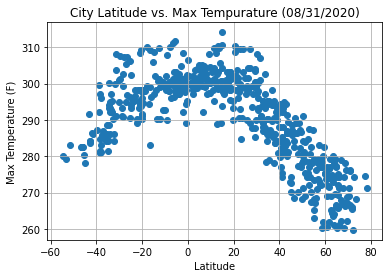

In [13]:
#Scatter plot
x_values = city_data_df['lat']
y_values = city_data_df['max_temp']
plt.scatter(x_values,y_values)

plt.title('City Latitude vs. Max Tempurature (08/31/2020)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("../output_data/scatter1.png")
plt.show()

## Latitude vs. Humidity Plot

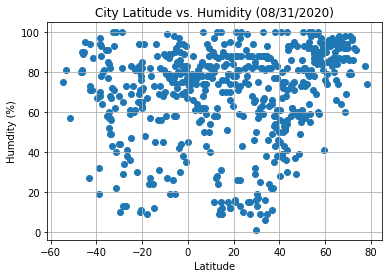

In [14]:
#Scatter plot
x_values = city_data_df['lat']
y_values = city_data_df['humidity']
plt.scatter(x_values,y_values)

plt.title('City Latitude vs. Humidity (08/31/2020)')
plt.ylabel('Humdity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("../output_data/scatter2.png")
plt.show()

## Latitude vs. Cloudiness Plot

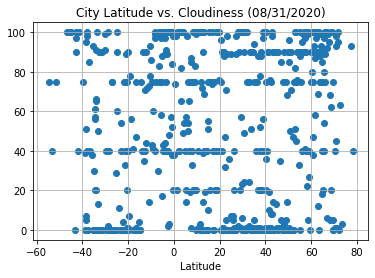

In [15]:
#Scatter plot
x_values = city_data_df['lat']
y_values = city_data_df['cloudiness']
plt.scatter(x_values,y_values)

plt.title('City Latitude vs. Cloudiness (08/31/2020)')
plt.ylabel('')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("../output_data/scatter3.png")
plt.show()

## Latitude vs. Wind Speed Plot

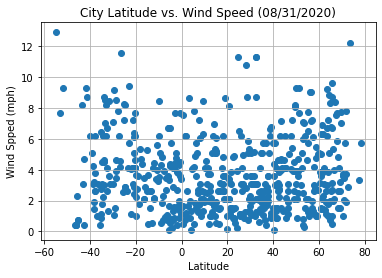

In [16]:
#Scatter plot
x_values = city_data_df['lat']
y_values = city_data_df['wind_speed']
plt.scatter(x_values,y_values)

plt.title('City Latitude vs. Wind Speed (08/31/2020)')
plt.ylabel('Wind Spped (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("../output_data/scatter4.png")
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

In [18]:
#Creating a data for for the specific hemishphers
south_hem = city_data_df.loc[city_data_df['lat']<0]
south_hem

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country
4,East London,-33.02,27.91,292.15,72,13,8.20,ZA
7,Santa Maria,-29.68,-53.81,301.14,44,0,1.07,BR
8,Poso,-1.40,120.75,301.48,70,100,1.65,ID
10,Angoram,-4.06,144.07,297.04,97,97,0.83,PG
12,Menongue,-14.66,17.69,308.76,12,0,3.68,AO
...,...,...,...,...,...,...,...,...
547,Oranjemund,-28.55,16.43,290.76,65,0,8.51,NA
552,Opuwo,-18.06,13.84,310.02,9,0,5.34,NA
553,Naivasha,-0.72,36.44,289.26,81,84,4.47,KE
560,Antalaha,-14.90,50.28,297.13,73,0,5.25,MG


In [19]:
north_hem = city_data_df.loc[city_data_df['lat']>0]
north_hem

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country
0,Riviere-au-Renard,49.00,-64.40,282.15,49,5,2.60,CA
1,Georgiyevskoye,58.73,45.02,276.98,94,100,4.75,RU
2,Norman Wells,65.28,-126.83,260.15,84,20,2.60,CA
3,Lompoc,34.64,-120.46,284.15,87,1,2.17,US
5,Tilichiki,60.47,166.10,273.85,90,80,3.15,RU
...,...,...,...,...,...,...,...,...
561,Cartagena,10.40,-75.51,303.15,89,40,4.10,CO
562,Isla Vista,34.41,-119.86,286.15,93,90,1.23,US
564,Chak Thirty-one -Eleven Left,30.43,72.70,297.95,17,0,1.06,PK
565,Kulu,39.10,33.08,293.33,38,97,1.22,TR


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# Add the linear regression equation and line to plot

def plot_regression(x_values, y_values, title, xlabel, ylabel,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(text_coordinates),fontsize=10,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f'The r-squared is {rvalue**2}')
    plt.savefig(f"../output_data/{title}.png")
    plt.show();

The r-squared is 0.7807269946806773


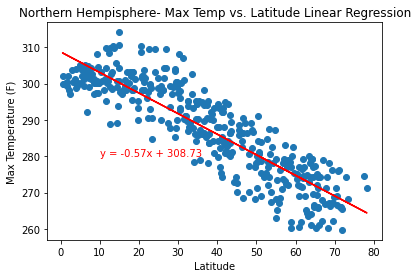

In [21]:
plot_regression(north_hem['lat'],
                north_hem['max_temp'], 
                'Northern Hempisphere- Max Temp vs. Latitude Linear Regression',
                'Latitude',
                'Max Temperature (F)',
                (10,280))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.4155504096773338


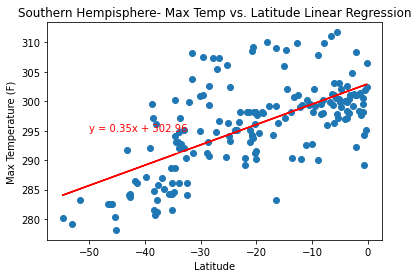

In [22]:
plot_regression(south_hem['lat'],
                south_hem['max_temp'], 
                'Southern Hempisphere- Max Temp vs. Latitude Linear Regression',
                'Latitude',
                'Max Temperature (F)',
                (-50,295))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.08742004010406543


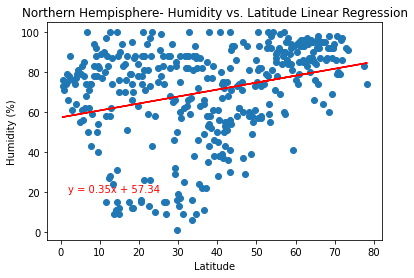

In [23]:
plot_regression(north_hem['lat'],
                north_hem['humidity'], 
                'Northern Hempisphere- Humidity vs. Latitude Linear Regression',
                'Latitude',
                'Humidity (%)',
                (2,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 1.5072921270727629e-05


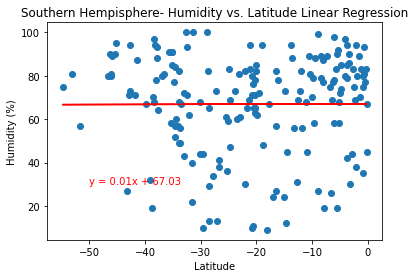

In [24]:
plot_regression(south_hem['lat'],
                south_hem['humidity'], 
                'Southern Hempisphere- Humidity vs. Latitude Linear Regression',
                'Latitude',
                'Humidity (%)',
                (-50,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.015006322986425466


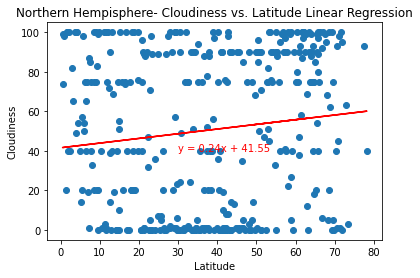

In [25]:
plot_regression(north_hem['lat'],
                north_hem['cloudiness'], 
                'Northern Hempisphere- Cloudiness vs. Latitude Linear Regression',
                'Latitude',
                'Cloudiness',
                (30,40))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.017910895548258827


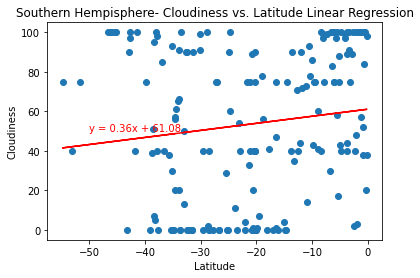

In [26]:
plot_regression(south_hem['lat'],
                south_hem['cloudiness'], 
                'Southern Hempisphere- Cloudiness vs. Latitude Linear Regression',
                'Latitude',
                'Cloudiness',
                (-50,50))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.02980058279957845


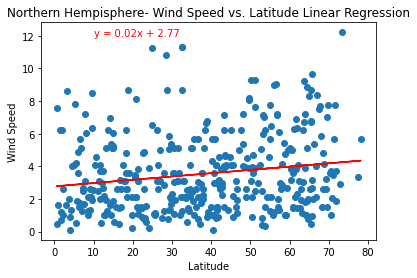

In [27]:
plot_regression(north_hem['lat'],
                north_hem['wind_speed'], 
                'Northern Hempisphere- Wind Speed vs. Latitude Linear Regression',
                'Latitude',
                'Wind Speed',
                (10,12))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.02980058279957845


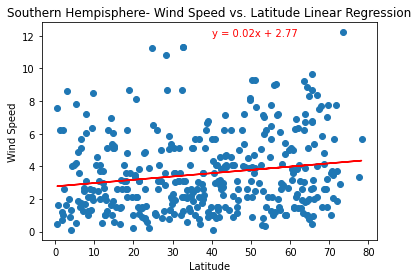

In [28]:
plot_regression(north_hem['lat'],
                north_hem['wind_speed'], 
                'Southern Hempisphere- Wind Speed vs. Latitude Linear Regression',
                'Latitude',
                'Wind Speed',
                (40,12))

## Observable trends based on data

 The scatter plot titled "Southern Hemisphere - Max Temp vs. Latitude Linear Regression" shows a positive correlation of temperature as you get closer to the equator.  Consequently, the northern hemispher vs max temperature shows a negative correlation as you move away from the equator.  
 
 The "City Latitude vs. Max Tempurature" scatter plot shows the above ovservation in a unique "bell shaped" which proves the sample size of cities is good representation of all the cities in the world.  And we conclude the closer we move toward the equator the hotter the temperature in the cities.
 
 The humidity of my sample size showed in the "City Latitude vs. Humidity" scatter plot most cities have a high humidity percentage despite position relative the equator.  
 
 Lastly, the cloudniess sctatter plots did not show any correlation of latitude position and clouiness. 
 